In [1]:
import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
df=pd.read_csv('winequality-white.csv',sep=';')

In [3]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
describe_before=df.describe().T.drop(columns=['count','25%','50%','75%']).round(decimals=3)
describe_before

,mean,std,min,max
fixed acidity,6.855,0.844,3.800,14.200
volatile acidity,0.278,0.101,0.080,1.100
citric acid,0.334,0.121,0.000,1.660
residual sugar,6.391,5.072,0.600,65.800
chlorides,0.046,0.022,0.009,0.346
free sulfur dioxide,35.308,17.007,2.000,289.000
total sulfur dioxide,138.361,42.498,9.000,440.000
density,0.994,0.003,0.987,1.039
pH,3.188,0.151,2.720,3.820
sulphates,0.490,0.114,0.220,1.080


In [5]:
df.density

0       1.00100
1       0.99400
2       0.99510
3       0.99560
4       0.99560
         ...   
4893    0.99114
4894    0.99490
4895    0.99254
4896    0.98869
4897    0.98941
Name: density, Length: 4898, dtype: float64

### remove outliers <0.5 >0.95 percentile:

In [6]:
maximum=False
if maximum==True:
    predict='density'
else:
    predict='sulphates'


# What to predict?

In [7]:
remove_outliers=True
if remove_outliers==True:
    features=[cols for cols in df.columns if cols != predict]
    for feat in features:
        y = df[feat]
        removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
        print(feat,'\n',removed_outliers.value_counts())

    print(50*'_')
    for feat in features:
        y = df[feat]
        removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
        print(feat,'\n',removed_outliers.value_counts())
        index_names = df[~removed_outliers].index
        df.drop(index_names, inplace=True)
    remove_outliers=False

fixed acidity 
 True     4477
False     421
Name: fixed acidity, dtype: int64
volatile acidity 
 True     4498
False     400
Name: volatile acidity, dtype: int64
citric acid 
 True     4448
False     450
Name: citric acid, dtype: int64
residual sugar 
 True     4487
False     411
Name: residual sugar, dtype: int64
chlorides 
 True     4429
False     469
Name: chlorides, dtype: int64
free sulfur dioxide 
 True     4438
False     460
Name: free sulfur dioxide, dtype: int64
total sulfur dioxide 
 True     4424
False     474
Name: total sulfur dioxide, dtype: int64
density 
 True     4415
False     483
Name: density, dtype: int64
pH 
 True     4444
False     454
Name: pH, dtype: int64
alcohol 
 True     4440
False     458
Name: alcohol, dtype: int64
quality 
 True     4535
False     363
Name: quality, dtype: int64
__________________________________________________
fixed acidity 
 True     4477
False     421
Name: fixed acidity, dtype: int64
volatile acidity 
 True     4101
False     376
Na

In [8]:
describe_after=df.describe().T.drop(columns=['count','25%','50%','75%']).round(decimals=3)
describe_after

,mean,std,min,max
fixed acidity,6.850,0.640,5.600,8.300
volatile acidity,0.263,0.066,0.150,0.450
citric acid,0.329,0.080,0.190,0.540
residual sugar,5.838,3.923,1.200,16.000
chlorides,0.043,0.008,0.027,0.064
free sulfur dioxide,35.765,12.461,12.000,63.000
total sulfur dioxide,139.913,32.248,84.000,211.000
density,0.994,0.002,0.990,0.998
pH,3.197,0.113,2.980,3.460
sulphates,0.493,0.110,0.260,1.080


In [9]:
df.shape

(1773, 12)

## get correlation matrix

In [10]:
corrMatrix = df.corr()
#print (corrMatrix)

In [11]:
for key in corrMatrix.keys():
    print(key,':',corrMatrix.keys()[corrMatrix[key].tolist().index(max([i for i in corrMatrix[key] if i !=1]))],max([i for i in corrMatrix[key] if i !=1]))
    if key == predict:
        best_feat=corrMatrix.keys()[corrMatrix[key].tolist().index(max([i for i in corrMatrix[key] if i !=1]))]

fixed acidity : citric acid 0.21297316320929913
volatile acidity : total sulfur dioxide 0.17970399423038186
citric acid : fixed acidity 0.21297316320929913
residual sugar : density 0.7879823578259156
chlorides : density 0.3871624545633949
free sulfur dioxide : total sulfur dioxide 0.5541071594840017
total sulfur dioxide : free sulfur dioxide 0.5541071594840017
density : residual sugar 0.7879823578259156
pH : sulphates 0.11783881494839922
sulphates : pH 0.11783881494839922
alcohol : quality 0.4438704903058224
quality : alcohol 0.4438704903058224


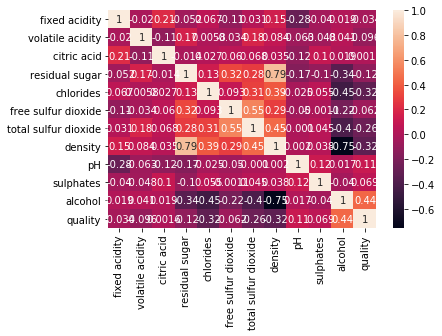

In [12]:
sn.heatmap(corrMatrix, annot=True)
plt.show()

Mean Absolute Error: 0.0744467231102498
Mean Squared Error: 0.010484142395097784
Root Mean Squared Error: 0.10239210123392226


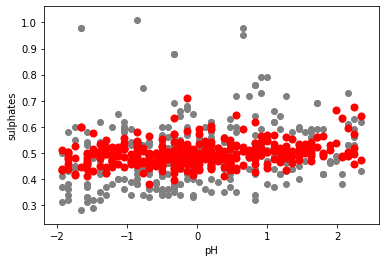

Mean Absolute Error: 0.07581753161411876
Mean Squared Error: 0.01065154756120418
Root Mean Squared Error: 0.10320633488892132


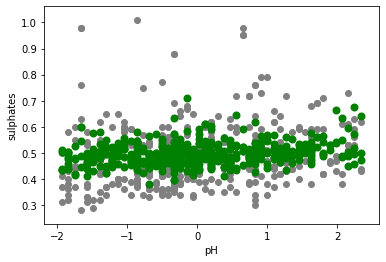

In [13]:
X=df.drop(columns=predict)
y=df[predict]

X=(X-X.mean())/X.std()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0)


regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm


y_pred = regressor.predict(X_test)
y_pred_val = regressor.predict(X_val)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

plt.scatter(X_test[best_feat], y_test,  color='gray')
plt.scatter(X_test[best_feat], y_pred, color='red', linewidth=2)

plt.xlabel(best_feat)
plt.ylabel(predict)
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred_val))  
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred_val))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))

plt.scatter(X_val[best_feat], y_val,  color='gray')
plt.scatter(X_val[best_feat], y_pred_val, color='green', linewidth=2)
plt.xlabel(best_feat)
plt.ylabel(predict)
plt.show()

In [14]:
(y_test-y_pred).abs().sum()
(y_test-y_pred).abs().std(),y_test.max()-y_test.min()

(0.07039735633401098, 0.73)

Mean Absolute Error: 0.05594985915492955
Mean Squared Error: 0.006850332450704223
Root Mean Squared Error: 0.08276673517001998


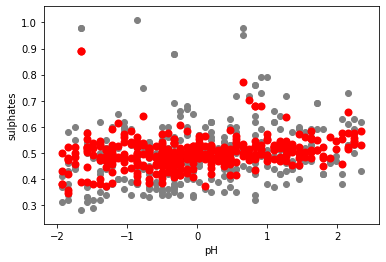

Mean Absolute Error: 0.05738986486486485
Mean Squared Error: 0.006917149076576574
Root Mean Squared Error: 0.08316939988106548


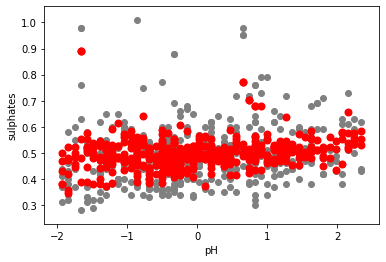

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=50, random_state=1)
regr.fit(X_train, y_train) #training the algorithm


y_pred = regr.predict(X_test)
y_pred_val = regr.predict(X_val)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


plt.scatter(X_test[best_feat], y_test,  color='gray')
plt.scatter(X_test[best_feat], y_pred, color='red', linewidth=2)
plt.xlabel(best_feat)
plt.ylabel(predict)
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred_val))  
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred_val))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))

plt.scatter(X_val[best_feat], y_val,  color='gray')
plt.scatter(X_val[best_feat], y_pred_val, color='red', linewidth=2)
plt.xlabel(best_feat)
plt.ylabel(predict)
plt.show()

Cross validation fold 1/5
Train indices: [   0    1    2 ... 1769 1770 1772]
Test indices: [   7   13   15   20   22   23   25   29   33   34   38   39   44   45
   48   52   63   67   70   79   81   82   83   95   98   99  105  118
  124  134  136  158  162  167  199  202  206  207  214  221  242  243
  248  249  252  255  257  258  259  260  264  265  273  274  280  283
  299  304  308  313  314  316  319  320  322  323  324  328  329  332
  335  347  351  368  369  372  373  387  393  397  398  400  409  410
  411  416  420  426  433  436  445  450  452  458  460  462  465  467
  470  495  498  501  504  516  518  521  530  533  537  541  543  549
  551  554  555  560  564  569  572  582  584  587  590  592  594  609
  613  617  621  622  624  625  628  634  639  643  649  654  657  661
  666  671  672  673  687  705  707  711  718  719  720  723  725  728
  732  736  740  746  747  759  764  766  767  770  772  777  780  782
  792  794  795  800  807  808  814  822  834  835  836  

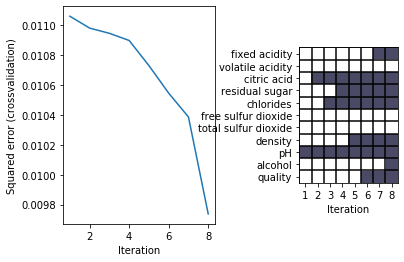

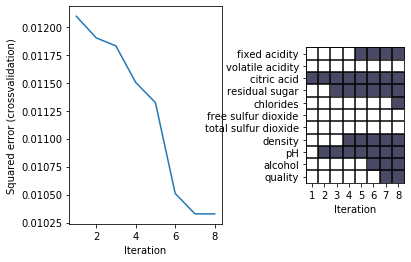

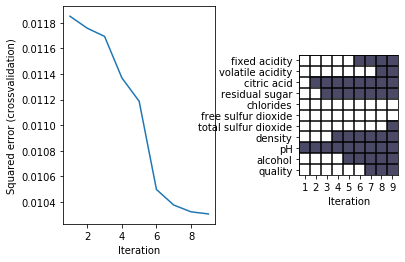

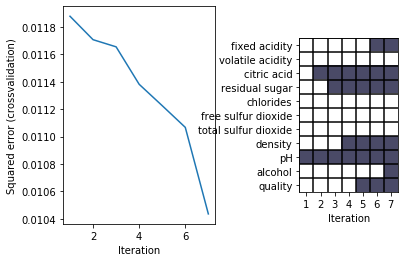

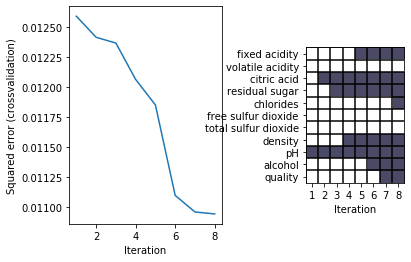

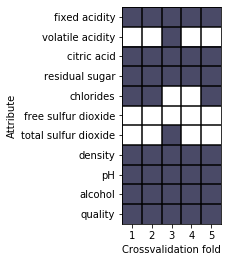

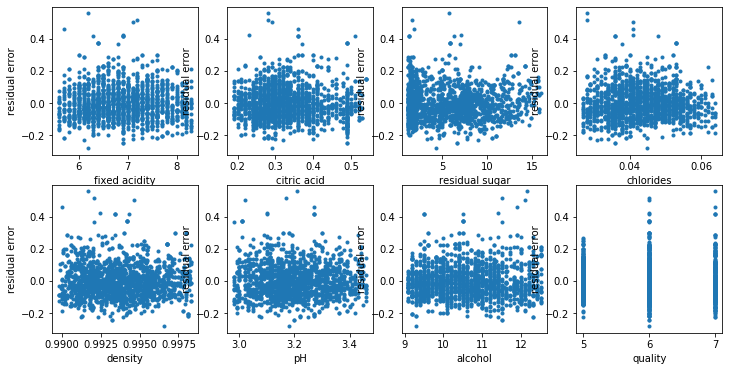

Ran Exercise 6.2.1


In [16]:
# exercise 6.2.1
from matplotlib.pyplot import figure, plot, subplot, title, xlabel, ylabel, show, clim
from scipy.io import loadmat
import sklearn.linear_model as lm
from sklearn import model_selection
from toolbox_02450 import feature_selector_lr, bmplot
import numpy as np

# Load data from matlab file
X=df.drop(columns=predict).values
y=df[predict].values
attributeNames = list(df.drop(columns=predict).columns)
N, M = X.shape


## Crossvalidation
# Create crossvalidation partition for evaluation
K = 5
CV = model_selection.KFold(n_splits=K,shuffle=True)

# Initialize variables
Features = np.zeros((M,K))
Error_train = np.empty((K,1))
Error_test = np.empty((K,1))
Error_train_fs = np.empty((K,1))
Error_test_fs = np.empty((K,1))
Error_train_nofeatures = np.empty((K,1))
Error_test_nofeatures = np.empty((K,1))

k=0
for train_index, test_index in CV.split(X):
    
    # extract training and test set for current CV fold
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]
    internal_cross_validation = 10
    
    # Compute squared error without using the input data at all
    Error_train_nofeatures[k] = np.square(y_train-y_train.mean()).sum()/y_train.shape[0]
    Error_test_nofeatures[k] = np.square(y_test-y_test.mean()).sum()/y_test.shape[0]

    # Compute squared error with all features selected (no feature selection)
    m = lm.LinearRegression(fit_intercept=True).fit(X_train, y_train)
    Error_train[k] = np.square(y_train-m.predict(X_train)).sum()/y_train.shape[0]
    Error_test[k] = np.square(y_test-m.predict(X_test)).sum()/y_test.shape[0]

    # Compute squared error with feature subset selection
    textout = ''
    selected_features, features_record, loss_record = feature_selector_lr(X_train, y_train, internal_cross_validation,display=textout)
    
    Features[selected_features,k] = 1
    # .. alternatively you could use module sklearn.feature_selection
    if len(selected_features) is 0:
        print('No features were selected, i.e. the data (X) in the fold cannot describe the outcomes (y).' )
    else:
        m = lm.LinearRegression(fit_intercept=True).fit(X_train[:,selected_features], y_train)
        Error_train_fs[k] = np.square(y_train-m.predict(X_train[:,selected_features])).sum()/y_train.shape[0]
        Error_test_fs[k] = np.square(y_test-m.predict(X_test[:,selected_features])).sum()/y_test.shape[0]
    
        figure(k)
        subplot(1,2,1)
        plot(range(1,len(loss_record)), loss_record[1:])
        xlabel('Iteration')
        ylabel('Squared error (crossvalidation)')
        
        subplot(1,3,3)
        bmplot(attributeNames, range(1,features_record.shape[1]), -features_record[:,1:])
        clim(-1.5,0)
        xlabel('Iteration')

    print('Cross validation fold {0}/{1}'.format(k+1,K))
    print('Train indices: {0}'.format(train_index))
    print('Test indices: {0}'.format(test_index))
    print('Features no: {0}\n'.format(selected_features.size))

    k+=1


# Display results
print('\n')
print('Linear regression without feature selection:\n')
print('- Training error: {0}'.format(Error_train.mean()))
print('- Test error:     {0}'.format(Error_test.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures.sum()-Error_test.sum())/Error_test_nofeatures.sum()))
print('Linear regression with feature selection:\n')
print('- Training error: {0}'.format(Error_train_fs.mean()))
print('- Test error:     {0}'.format(Error_test_fs.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train_fs.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures.sum()-Error_test_fs.sum())/Error_test_nofeatures.sum()))

figure(k)
subplot(1,3,2)
bmplot(attributeNames, range(1,Features.shape[1]+1), -Features)
clim(-1.5,0)
xlabel('Crossvalidation fold')
ylabel('Attribute')


# Inspect selected feature coefficients effect on the entire dataset and
# plot the fitted model residual error as function of each attribute to
# inspect for systematic structure in the residual

f=2 # cross-validation fold to inspect
ff=Features[:,f-1].nonzero()[0]
if len(ff) is 0:
    print('\nNo features were selected, i.e. the data (X) in the fold cannot describe the outcomes (y).' )
else:
    m = lm.LinearRegression(fit_intercept=True).fit(X[:,ff], y)
    
    y_est= m.predict(X[:,ff])
    residual=y-y_est
    
    figure(k+1, figsize=(12,6))
    title('Residual error vs. Attributes for features selected in cross-validation fold {0}'.format(f))
    for i in range(0,len(ff)):
       subplot(2,np.ceil(len(ff)/2.0),i+1)
       plot(X[:,ff[i]],residual,'.')
       xlabel(attributeNames[ff[i]])
       ylabel('residual error')
    
    
show()

print('Ran Exercise 6.2.1')